In [38]:
import sympy
import matplotlib.pyplot as plt
import numpy
import control 
from control.matlab import *
sympy.init_printing()
%matplotlib inline

In [39]:
from ipywidgets import interact

In [90]:
ts = numpy.linspace(0, 40,1000)

s = tf([1,0],1)

def secondorder(wn_in, zeta_in,Tp_in):
    G = wn_in**2/((s**2+2*zeta_in*wn_in*s + wn_in**2)*(1+Tp_in*s))
    
    #G = wn_in**2*(1+Tp_in*s)/((s**2+2*zeta_in*wn_in*s + wn_in**2))
    
    plt.figure(figsize=(12, 6))
    ax_impulse = plt.subplot2grid((2, 2), (0, 0))
    ax_step = plt.subplot2grid((2, 2), (1, 0))
    ax_complex = plt.subplot2grid((2, 2), (0, 1), rowspan=2)

    y,t = impulse(G,ts)
    ax_impulse.plot(t , y)
    ax_impulse.set_title('Impulse response')
    ax_impulse.set_ylim(-1, 2)

    y,t = step(G,ts)
    ax_step.set_title('Step response')
    ax_step.plot(t ,y)
    ax_step.set_ylim(0, 2)


    ax_complex.set_title('Poles plot')
    pole,zero = pzmap(G, plot = False)
    ax_complex.scatter(pole.real, pole.imag, marker='x', s=30)
    ax_complex.scatter(zero.real, zero.imag, marker='o', s=30)
    #ax_complex.axhline(0, color='black')
    #ax_complex.axvline(0, color='black')
    ax_complex.axis([-10,0.10, -2, 2])

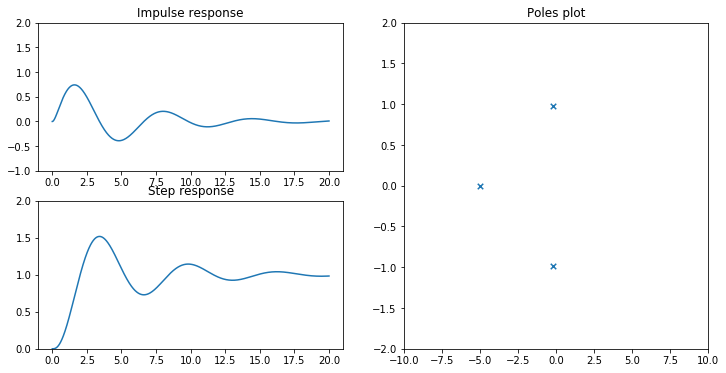

In [82]:
secondorder(1.0, 0.2, 0.2)

In [92]:
interact(secondorder, wn_in=(1, 10), zeta_in=(0.1, 1.0), Tp_in=(0.01, 20));

interactive(children=(IntSlider(value=5, description='wn_in', max=10, min=1), FloatSlider(value=0.55, descript…